In [ ]:
# Import libraries
import pandas as pd
import numpy as np

from glob import glob

import matplotlib.pyplot as plt


In [3]:
# Here we will take a look at the description Excel sheet to understand our data better.
# 
df_description =  pd.read_excel('Data/CDR_description.xlsx')

df_description.head(12)


# from the output we see the needed columns and the ones to be dropped
#  we can also see the columns to change names enabling us to make our identifiers known easily.
# Also shows the data types


,Column name,Description,Format
0,PRODUCT,Voice or SMS,String
1,VALUE,Billing price,Integer
2,DATE_TIME,Time in format yyyy-MM-dd hh:mm:ss.0,String
3,CELL_ON_SITE,Which cell in the site was used (not needed here),Integer
4,DW_A_NUMBER_INT,Anonymized phone number of the person for whic...,String
5,DW_B_NUMBER_INT,Anonymized phone number of the counterparty,String
6,COUNTRY_A,Country of party A (useless here),String
7,COUNTRY_B,Country of party B (useless here),String
8,CELL_ID,ID of the cell,String
9,SITE_ID,ID of the SITE,String


In [4]:
# Here we take a look at our cells location file.
# 


df_cellgeo = pd.read_csv('Data\cells_geo.csv', sep=";", encoding='utf-8')

df_cellgeo.head(5)

,Unnamed: 0,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE
0,0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,fbb2e75af3,0bb492ef17
1,1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,1502501d78,0bb492ef17
2,2,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0c2e182a0c,0bb492ef17
3,3,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,69bdfc69fd,8a1e6ce31f
4,4,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,7a1029d2ab,8a1e6ce31f


In [5]:
# we load the csv containing the data sets
# With a data preview

tel1 = pd.read_csv('Data\Telcom_dataset.csv', delimiter= ',',encoding= 'utf8')
tel1

tel1.columns = ['Product', 'Bill_Price','Date_time', 'Cell_onsite','DW_A','DW_B', 'Country_A','Country_B','Cell_id', 'Site_id']

tel1.head()

,Product,Bill_Price,Date_time,Cell_onsite,DW_A,DW_B,Country_A,Country_B,Cell_id,Site_id
0,Voice,0,2012-05-06 23:04:37.0,1,49fae048b547780,1a49f8b0ded9de6,19e2e,19e2e,/TJNe+Mmtu,/TJNe+Mmtu
1,sms,0,2012-05-06 23:05:25.0,0,7a54a6eaee19e65,93343ba6e41af95,19e2e,19e2e,/+cKZKIp41,/+cKZKIp41
2,sms,25,2012-05-06 23:05:41.0,0,6008887b0207d82,7aacc9709ce0a20,19e2e,19e2e,/u0FSD+ahi,/u0FSD+ahi
3,Voice,56,2012-05-06 23:05:42.0,1,7370032e20f4e96,6af4a60e74c91d3,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3
4,Voice,14,2012-05-06 23:06:29.0,1,966ba4656e38e62,02aa736ee555d5c,19e2e,19e2e,051KhYDCpv,051KhYDCpv


In [6]:
# Second data set.
# With a data preview

tel2 = pd.read_csv('Data\Telcom_dataset2.csv', delimiter= ',',encoding= 'utf8')
tel1

tel2.columns = ['Product', 'Bill_Price','Date_time', 'Cell_onsite','DW_A','DW_B', 'Country_A','Country_B','Cell_id', 'Site_id']

tel2.head()

,Product,Bill_Price,Date_time,Cell_onsite,DW_A,DW_B,Country_A,Country_B,Cell_id,Site_id
0,sms,0,2012-05-07 23:02:06.0,2,32255675c3b6fe3,1aa7ae01386e9fb,19e2e,19e2e,+854AcBQT2,+854AcBQT2
1,Voice,0,2012-05-07 23:03:44.0,1,ff16d6ac74c1c64,87d87309c15a8c9,19e2e,19e2e,+854AcBQT2,+854AcBQT2
2,sms,0,2012-05-07 23:04:06.0,0,98d9f2fb5ff624b,93343ba6e41af95,19e2e,19e2e,+laSrk7g6q,+laSrk7g6q
3,Voice,37,2012-05-07 23:04:48.0,1,3f9c8a33ec7be1f,7d05a38f89c49d8,19e2e,19e2e,/xvRrCVKoQ,/xvRrCVKoQ
4,sms,25,2012-05-07 23:04:58.0,1,7bcccc03adf3864,56a5d5430d2fa86,19e2e,19e2e,+bO+qkSonO,+bO+qkSonO


In [7]:
# For our third data set.
# With a data preview

tel3 = pd.read_csv('Data\Telcom_dataset3.csv', delimiter= ',',encoding= 'utf8')
tel3

tel3.columns = ['Product', 'Bill_Price','Date_time', 'Cell_onsite','DW_A','DW_B', 'Country_A','Country_B','Cell_id', 'Site_id']

tel3.head()

,Product,Bill_Price,Date_time,Cell_onsite,DW_A,DW_B,Country_A,Country_B,Cell_id,Site_id
0,Voice,61,2012-05-08 23:01:28.0,2,966f68353622feb,ffd53a3bb2db6f1,19e2e,19e2e,+38u2u/rfx,+38u2u/rfx
1,sms,0,2012-05-08 23:01:31.0,1,a0a597384c612d7,cf3b218f1dde792,19e2e,19e2e,+Fs4mTvdKx,+Fs4mTvdKx
2,Voice,10,2012-05-08 23:02:59.0,1,5441a9a58c97132,52f8b299515b9b7,19e2e,19e2e,+ZaaZozy/+,+ZaaZozy/+
3,sms,0,2012-05-08 23:03:04.0,0,8ab8b9ed6989f61,e09e736e46c5c3d,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3
4,Voice,22,2012-05-08 23:03:16.0,4,52662a62b199334,2186273faab4602,19e2e,19e2e,/eeMklgyJA,/eeMklgyJA


In [8]:
# We should clean the data frames for any duplicates in the data and also
#  Removing missing values and droppping uneccesary columns as per our guide on the Description

# Start with df_cellgeo
# Check to see info details
#  Step two check for duplicates and missing values
# 
df_cellgeo.info()

df_cellgeo.duplicated().value_counts()

# Check for missing values
df_cellgeo.isnull().sum().sort_values(ascending=False)


# Drop Duplicates
df_cellgeo.drop_duplicates(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3974 entries, 0 to 3973
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    3974 non-null   int64  
 1   VILLES        3974 non-null   object 
 2   STATUS        3907 non-null   object 
 3   LOCALISATION  3974 non-null   object 
 4   DECOUPZONE    3974 non-null   object 
 5   ZONENAME      3968 non-null   object 
 6   LONGITUDE     3974 non-null   float64
 7   LATITUDE      3974 non-null   float64
 8   REGION        3974 non-null   object 
 9   AREA          3951 non-null   object 
 10  CELL_ID       3974 non-null   object 
 11  SITE_CODE     3974 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 372.7+ KB


In [9]:
# Now for Our datasets
# Check to see info details
#  Step two check for duplicates and missing values
# 
tel1.info()

tel1.duplicated().value_counts()

# Check for missing values
tel1.isnull().sum().sort_values(ascending=False)


# Drop Duplicates
tel1.drop_duplicates(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Product      5001 non-null   object
 1   Bill_Price   5001 non-null   int64 
 2   Date_time    5001 non-null   object
 3   Cell_onsite  5001 non-null   object
 4   DW_A         5001 non-null   object
 5   DW_B         5001 non-null   object
 6   Country_A    5001 non-null   object
 7   Country_B    5001 non-null   object
 8   Cell_id      5001 non-null   object
 9   Site_id      4285 non-null   object
dtypes: int64(1), object(9)
memory usage: 390.8+ KB


In [10]:
# Now for Our datasets
# Check to see info details
#  Step two check for duplicates and missing values
# 
tel2.info()

tel2.duplicated().value_counts()

# Check for missing values
tel2.isnull().sum().sort_values(ascending=False)


# Drop Duplicates
tel2.drop_duplicates(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Product      5001 non-null   object
 1   Bill_Price   5001 non-null   int64 
 2   Date_time    5001 non-null   object
 3   Cell_onsite  5001 non-null   object
 4   DW_A         5001 non-null   object
 5   DW_B         5001 non-null   object
 6   Country_A    5001 non-null   object
 7   Country_B    5001 non-null   object
 8   Cell_id      5001 non-null   object
 9   Site_id      4325 non-null   object
dtypes: int64(1), object(9)
memory usage: 390.8+ KB


In [11]:
# Now for Our datasets
# Check to see info details
#  Step two check for duplicates and missing values
# 
tel3.info()

tel3.duplicated().value_counts()

# Check for missing values
tel3.isnull().sum().sort_values(ascending=False)


# Drop Duplicates
tel3.drop_duplicates(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Product      5001 non-null   object
 1   Bill_Price   5001 non-null   int64 
 2   Date_time    5001 non-null   object
 3   Cell_onsite  5001 non-null   object
 4   DW_A         5001 non-null   object
 5   DW_B         5001 non-null   object
 6   Country_A    5001 non-null   object
 7   Country_B    5001 non-null   object
 8   Cell_id      5001 non-null   object
 9   Site_id      4396 non-null   object
dtypes: int64(1), object(9)
memory usage: 390.8+ KB


In [12]:
# Now that the datasets are cleaned up we can now join them into one sheet
# 

master_datasets =  pd.concat([tel1,tel2,tel3], axis=0, join='outer',ignore_index=True)

master_datasets.head(10)

,Product,Bill_Price,Date_time,Cell_onsite,DW_A,DW_B,Country_A,Country_B,Cell_id,Site_id
0,Voice,0,2012-05-06 23:04:37.0,1,49fae048b547780,1a49f8b0ded9de6,19e2e,19e2e,/TJNe+Mmtu,/TJNe+Mmtu
1,sms,0,2012-05-06 23:05:25.0,0,7a54a6eaee19e65,93343ba6e41af95,19e2e,19e2e,/+cKZKIp41,/+cKZKIp41
2,sms,25,2012-05-06 23:05:41.0,0,6008887b0207d82,7aacc9709ce0a20,19e2e,19e2e,/u0FSD+ahi,/u0FSD+ahi
3,Voice,56,2012-05-06 23:05:42.0,1,7370032e20f4e96,6af4a60e74c91d3,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3
4,Voice,14,2012-05-06 23:06:29.0,1,966ba4656e38e62,02aa736ee555d5c,19e2e,19e2e,051KhYDCpv,051KhYDCpv
5,data,0,2012-05-06 23:07:26.0,_,f71825ca6e623f9,5a4dc9e82deb309,19e2e,OTHER,/lrUXVGVcN,/lrUXVGVcN
6,Voice,0,2012-05-06 23:08:02.0,1,4afd7d5af21b1ce,67bf1ac30e58e2f,19e2e,19e2e,+38u2u/rfx,+38u2u/rfx
7,Voice,0,2012-05-06 23:08:03.0,5,d717dee81c51389,adde5afd9a67b10,19e2e,19e2e,09UjmmY1Ds,09UjmmY1Ds
8,Voice,0,2012-05-06 23:08:05.0,1,44522aefdc918a6,19e68e80103885e,19e2e,19e2e,0DeimCpZOc,0DeimCpZOc
9,sms,0,2012-05-06 23:08:43.0,0,0763a571d24db64,f773694c00c74d2,19e2e,19e2e,01MDiY5F89,01MDiY5F89


In [13]:
# We can take a look at some info on the merged data
# To seek out where our data points are.
# We will need to drop some columns since they are not needed.

master_datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14750 entries, 0 to 14749
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Product      14750 non-null  object
 1   Bill_Price   14750 non-null  int64 
 2   Date_time    14750 non-null  object
 3   Cell_onsite  14750 non-null  object
 4   DW_A         14750 non-null  object
 5   DW_B         14750 non-null  object
 6   Country_A    14750 non-null  object
 7   Country_B    14750 non-null  object
 8   Cell_id      14750 non-null  object
 9   Site_id      12789 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.1+ MB


In [14]:
# Dropping columns on the master Data set.
# 
master_datasets.drop("Cell_onsite", axis=1, inplace=True)
master_datasets.drop("Country_A", axis=1, inplace=True)
master_datasets.drop("Country_B", axis=1, inplace=True)


In [15]:
# To preview changes
master_datasets.head()

,Product,Bill_Price,Date_time,DW_A,DW_B,Cell_id,Site_id
0,Voice,0,2012-05-06 23:04:37.0,49fae048b547780,1a49f8b0ded9de6,/TJNe+Mmtu,/TJNe+Mmtu
1,sms,0,2012-05-06 23:05:25.0,7a54a6eaee19e65,93343ba6e41af95,/+cKZKIp41,/+cKZKIp41
2,sms,25,2012-05-06 23:05:41.0,6008887b0207d82,7aacc9709ce0a20,/u0FSD+ahi,/u0FSD+ahi
3,Voice,56,2012-05-06 23:05:42.0,7370032e20f4e96,6af4a60e74c91d3,+cNeJzsTp3,+cNeJzsTp3
4,Voice,14,2012-05-06 23:06:29.0,966ba4656e38e62,02aa736ee555d5c,051KhYDCpv,051KhYDCpv


In [17]:
# We will splite date and time just to have a better master dataset
# 

master_datasets[['Date', 'time']] = master_datasets.Date_time.str.split(expand=True)
master_datasets.head()

,Product,Bill_Price,Date_time,DW_A,DW_B,Cell_id,Site_id,Date,time
0,Voice,0,2012-05-06 23:04:37.0,49fae048b547780,1a49f8b0ded9de6,/TJNe+Mmtu,/TJNe+Mmtu,2012-05-06,23:04:37.0
1,sms,0,2012-05-06 23:05:25.0,7a54a6eaee19e65,93343ba6e41af95,/+cKZKIp41,/+cKZKIp41,2012-05-06,23:05:25.0
2,sms,25,2012-05-06 23:05:41.0,6008887b0207d82,7aacc9709ce0a20,/u0FSD+ahi,/u0FSD+ahi,2012-05-06,23:05:41.0
3,Voice,56,2012-05-06 23:05:42.0,7370032e20f4e96,6af4a60e74c91d3,+cNeJzsTp3,+cNeJzsTp3,2012-05-06,23:05:42.0
4,Voice,14,2012-05-06 23:06:29.0,966ba4656e38e62,02aa736ee555d5c,051KhYDCpv,051KhYDCpv,2012-05-06,23:06:29.0


In [18]:
# Then we an drop the combined date and time column
# 
master_datasets.drop("Date_time", axis=1, inplace=True)
master_datasets.head()

,Product,Bill_Price,DW_A,DW_B,Cell_id,Site_id,Date,time
0,Voice,0,49fae048b547780,1a49f8b0ded9de6,/TJNe+Mmtu,/TJNe+Mmtu,2012-05-06,23:04:37.0
1,sms,0,7a54a6eaee19e65,93343ba6e41af95,/+cKZKIp41,/+cKZKIp41,2012-05-06,23:05:25.0
2,sms,25,6008887b0207d82,7aacc9709ce0a20,/u0FSD+ahi,/u0FSD+ahi,2012-05-06,23:05:41.0
3,Voice,56,7370032e20f4e96,6af4a60e74c91d3,+cNeJzsTp3,+cNeJzsTp3,2012-05-06,23:05:42.0
4,Voice,14,966ba4656e38e62,02aa736ee555d5c,051KhYDCpv,051KhYDCpv,2012-05-06,23:06:29.0


In [46]:
# Checking the most active hour.
# Seems that we only have midnight
import datetime as dt
master_datasets.time.astype('datetime64[ns]').dt.hour.value_counts()




0     12731
23     2019
Name: time, dtype: int64

In [19]:
# We need to preview the Cells geo location files to check whether it is okay for merging with 
# the master dataset.

df_cellgeo.head()

,Unnamed: 0,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE
0,0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,fbb2e75af3,0bb492ef17
1,1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,1502501d78,0bb492ef17
2,2,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0c2e182a0c,0bb492ef17
3,3,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,69bdfc69fd,8a1e6ce31f
4,4,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,7a1029d2ab,8a1e6ce31f


In [20]:
# We can drop one uneeded column called Unamed since it will not affect our data points.
# 

df_cellgeo.drop('Unnamed: 0', axis=1, inplace=True)

In [21]:
# we check for changes
# 

df_cellgeo.tail()

,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE
3969,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.039694,7.428611,MARAHOUE,CENTRE NORTH,1cfc2d7ab1,f91ed8d2e9
3970,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.039694,7.428611,MARAHOUE,CENTRE NORTH,3ae1708153,f91ed8d2e9
3971,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.065450,7.444592,MARAHOUE,CENTRE NORTH,cb71f8a29c,61bee9c70c
3972,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.065450,7.444592,MARAHOUE,CENTRE NORTH,d4a6a0b645,61bee9c70c
3973,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.065450,7.444592,MARAHOUE,CENTRE NORTH,f9f3e42589,61bee9c70c


In [22]:
# Now we can merge with the master data sets.
# we have two identical columns so we have to combine them

mergedmaster = pd.merge(master_datasets, df_cellgeo, how='inner',left_on="Site_id",right_on="SITE_CODE")

In [23]:
# Preview changes to our final data set.
# 

mergedmaster.head()

,Product,Bill_Price,DW_A,DW_B,Cell_id,Site_id,Date,time,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE
0,sms,0,8118c3aa53d6c7b,1d103ea638ad1f0,5d9dc897f7,1b5540c02d,2012-05-07,00:00:00.0,BOUAKE,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-5.027139,7.718417,VALLEE DU BANDAMA,CENTRE NORTH,24ccdda3d5,1b5540c02d
1,sms,0,8118c3aa53d6c7b,1d103ea638ad1f0,5d9dc897f7,1b5540c02d,2012-05-07,00:00:00.0,BOUAKE,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-5.027139,7.718417,VALLEE DU BANDAMA,CENTRE NORTH,ebfc58af70,1b5540c02d
2,sms,0,8118c3aa53d6c7b,1d103ea638ad1f0,5d9dc897f7,1b5540c02d,2012-05-07,00:00:00.0,BOUAKE,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-5.027139,7.718417,VALLEE DU BANDAMA,CENTRE NORTH,ba8ce6e4ef,1b5540c02d
3,sms,0,8118c3aa53d6c7b,1d103ea638ad1f0,5d9dc897f7,1b5540c02d,2012-05-07,00:00:00.0,BOUAKE,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-5.027139,7.718417,VALLEE DU BANDAMA,CENTRE NORTH,c2545171dc,1b5540c02d
4,sms,0,8118c3aa53d6c7b,1d103ea638ad1f0,5d9dc897f7,1b5540c02d,2012-05-07,00:00:00.0,BOUAKE,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-5.027139,7.718417,VALLEE DU BANDAMA,CENTRE NORTH,f15bd5483f,1b5540c02d


In [24]:
# We need to drop Identical column
# 
to_drop = ['Cell_id','Site_id']
mergedmaster.drop(to_drop, axis=1, inplace=True)

In [25]:
# Check for changes
# We have succesfully clean our data now we can sample out what we need.

mergedmaster.head()

,Product,Bill_Price,DW_A,DW_B,Date,time,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE
0,sms,0,8118c3aa53d6c7b,1d103ea638ad1f0,2012-05-07,00:00:00.0,BOUAKE,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-5.027139,7.718417,VALLEE DU BANDAMA,CENTRE NORTH,24ccdda3d5,1b5540c02d
1,sms,0,8118c3aa53d6c7b,1d103ea638ad1f0,2012-05-07,00:00:00.0,BOUAKE,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-5.027139,7.718417,VALLEE DU BANDAMA,CENTRE NORTH,ebfc58af70,1b5540c02d
2,sms,0,8118c3aa53d6c7b,1d103ea638ad1f0,2012-05-07,00:00:00.0,BOUAKE,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-5.027139,7.718417,VALLEE DU BANDAMA,CENTRE NORTH,ba8ce6e4ef,1b5540c02d
3,sms,0,8118c3aa53d6c7b,1d103ea638ad1f0,2012-05-07,00:00:00.0,BOUAKE,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-5.027139,7.718417,VALLEE DU BANDAMA,CENTRE NORTH,c2545171dc,1b5540c02d
4,sms,0,8118c3aa53d6c7b,1d103ea638ad1f0,2012-05-07,00:00:00.0,BOUAKE,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-5.027139,7.718417,VALLEE DU BANDAMA,CENTRE NORTH,f15bd5483f,1b5540c02d


In [26]:
# 

mergedmaster.isnull().sum()

mergedmaster.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 50318 entries, 0 to 50317
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       50318 non-null  object 
 1   Bill_Price    50318 non-null  int64  
 2   DW_A          50318 non-null  object 
 3   DW_B          50318 non-null  object 
 4   Date          50318 non-null  object 
 5   time          50318 non-null  object 
 6   VILLES        50318 non-null  object 
 7   STATUS        49615 non-null  object 
 8   LOCALISATION  50318 non-null  object 
 9   DECOUPZONE    50318 non-null  object 
 10  ZONENAME      50300 non-null  object 
 11  LONGITUDE     50318 non-null  float64
 12  LATITUDE      50318 non-null  float64
 13  REGION        50318 non-null  object 
 14  AREA          50062 non-null  object 
 15  CELL_ID       50318 non-null  object 
 16  SITE_CODE     50318 non-null  object 
dtypes: float64(2), int64(1), object(14)
memory usage: 6.9+ MB


In [27]:
# We can go through our data points to find busiest cells.
# Overloaded cells
# Here we see sms is more prominent with 57% and Voice being 42%
plot1 = mergedmaster["Product"].value_counts(normalize=True)
print(plot1)

sms      0.577368
Voice    0.422632
Name: Product, dtype: float64


<AxesSubplot:>

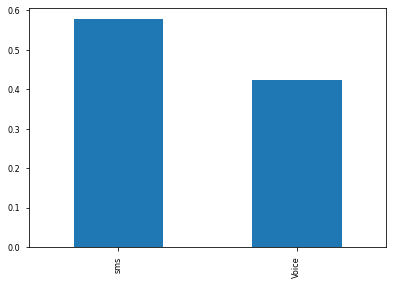

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize']=  (8,8)
import matplotlib
matplotlib.style.use('seaborn-paper')
plot1.plot.bar()



In [29]:
# Now we compare to see which of the two is actually bringing in more money.
# Voice is giving more money despite being less common.

more_profitable = mergedmaster.groupby(["Product"])["Bill_Price"].sum()

print(more_profitable)

Product
Voice    1175747
sms       232100
Name: Bill_Price, dtype: int64


<AxesSubplot:xlabel='Product'>

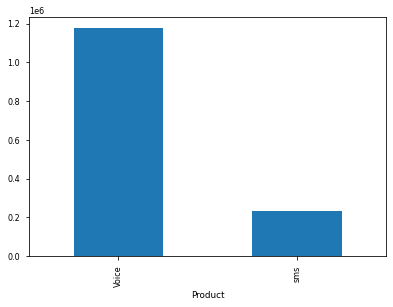

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize']=  (8,8)
import matplotlib
matplotlib.style.use('seaborn-paper')
more_profitable.plot.bar()

In [31]:
# Checking which area is more dominant.
# To narrow down which are the larger areas and who will need expansion.
# The output is in percentage.


area_data =mergedmaster["AREA"].value_counts(normalize=True)
print(area_data)

ABIDJAN NORTH    0.481223
ABIDJAN SOUTH    0.172846
CENTRE NORTH     0.115417
NORTH WEST       0.102753
SOUTH WEST       0.097619
EAST             0.030143
Name: AREA, dtype: float64


<AxesSubplot:>

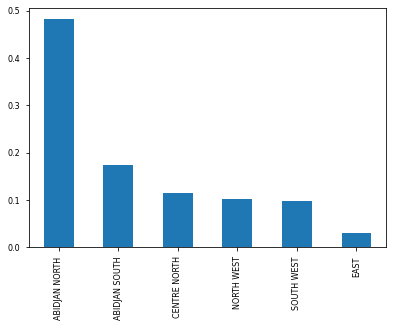

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize']=  (8,8)
import matplotlib
matplotlib.style.use('seaborn-paper')
area_data.plot.bar()

In [33]:
# Filtering out our data to find out which cities were most used during the period of our data set.
# 

mergedmaster["VILLES"].value_counts().head(20)

YOPOUGON        8549
ABOBO           6159
COCODY          3716
ADJAME          2655
KOUMASSI        2275
MARCORY         2104
YAMOUSSOUKRO    2076
TREICHVILLE     2026
DALOA           1747
ATTECOUBE       1634
PORT-BOUET      1527
SAN-PEDRO       1291
BOUAKE          1242
DIVO             969
MAN              738
GAGNOA           648
SOUBRE           537
KORHOGO          444
DABOU            414
SEGUELA          357
Name: VILLES, dtype: int64

In [34]:
# Which regions have the highest traffic?
mergedmaster['REGION'].value_counts()

LAGUNE               32960
LACS                  2408
BAS SASSANDRA         2327
HAUT SASSANDRA        2286
VALLEE DU BANDAMA     1551
SUD BANDAMA           1518
SAVANE                 999
18 MONTAGNES           936
FROMAGER               904
WORODOUGOU             792
MARAHOUE               618
AGNEBY                 583
NZI COMOE              564
MOYEN CAVALLY          528
DENGUELE               395
ZANZAN                 330
MOYEN COMOE            315
SUD COMOE              205
BAFING                  99
Name: REGION, dtype: int64

In [35]:
# Filtering our data to find out which are the most common sites.
# Mostly used sites means more load on the site infrastructure.


site_count = mergedmaster["SITE_CODE"].value_counts().head(50)

print(site_count)

5c565fbfb1    675
7f76d66503    660
b47a998a3e    588
928a59b635    513
c15166ba4d    441
91e86be9a6    432
c07a544c63    414
d96dcd5475    408
1ddea341cd    378
bc58a52936    360
585a3bc66c    354
dac8dcaeb9    354
47657c9634    342
ebfc58af70    342
8fd6f8d1c5    336
75bef3291a    312
8cdff2a0a2    312
f7d63a29e5    306
1ed7b897b7    306
ea07812c27    300
2371f0c1df    294
d06f40f9d5    294
700e13a5cf    294
487765ff90    288
8e6413d5b8    288
d1809b909f    288
e9639876a8    282
c2545171dc    282
7ee1a1444f    276
bfed0deee9    276
40bb97c420    270
200a092e1c    270
65efe2bc62    270
e42de17efb    264
fd14c3c790    264
3ae1708153    264
7bb5edf329    264
651c6d67d4    252
cef29910fb    252
11e254d6b7    240
ead9f3d03f    234
012114d799    234
029ef38f0b    234
1946bb6fbf    234
0f34c36ac5    228
4df1cab780    228
16205e9f52    228
dea1e52d3b    228
c1ec9c885f    222
5639bea67f    222
Name: SITE_CODE, dtype: int64


In [36]:
# Grouping our data by zone name 
# To narrow down our search of which products are most used in the specified zones.


zone_group = mergedmaster.groupby(["ZONENAME"])

In [37]:
# Getting the data to identify how product usage is spread out in the zones.
# 

zone_group["Product"].value_counts()

ZONENAME                 Product
AGBANNEW                 Voice         3
NPONON                   sms          48
                         Voice        24
OKAHOTEL                 sms         104
                         Voice        16
PALMABINGERVILLE         sms          15
                         Voice         6
WILLIAMSVILLE2           sms          22
                         Voice        18
ZONE A - Abidjan_CENTRE  sms        2487
                         Voice      1662
ZONE A - Abidjan_OUEST   Voice        12
                         sms           9
ZONE A - Grand-EST       Voice         6
ZONE A - Grand-NORD      Voice      2396
                         sms        1551
ZONE A - Grand-SUD       Voice        12
                         sms           6
ZONE B - Abidjan-EST     sms           3
ZONE B - Abidjan_CENTRE  Voice         2
ZONE B - Abidjan_EST     sms        2679
                         Voice      2326
ZONE B - Abidjan_Nord    sms           3
ZONE B - Abidjan_OUEST  

In [38]:
# Investigating active sites pper city.

cellid_group = mergedmaster.groupby(["VILLES"])


In [39]:
sites = cellid_group["SITE_CODE"].value_counts()

print(sites)

VILLES       SITE_CODE 
ABENGOUROU   00197a4f5f    120
             547385b9d5     21
             40cb5c4468     18
             aa2d7103fc     12
             6e87d6cb59      9
                          ... 
ZON-HOUNIEN  32b8357a82      9
ZOUKOUGBEU   443ac3fc19     12
ZUENOULA     f91ed8d2e9     66
             61bee9c70c     42
             43adae9a57     18
Name: SITE_CODE, Length: 866, dtype: int64


In [41]:
# Checking our time data sets
# Time is only a rough estimate of 1hr 43 mins
# Determining number of cities most active during the day won't be as possible due to this limitation
# 

mergedmaster["time"].head()


0    00:00:00.0
1    00:00:00.0
2    00:00:00.0
3    00:00:00.0
4    00:00:00.0
Name: time, dtype: object